# Machine Learning Assignment
                                                                                               Shane Healy, October 2019

In [76]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns
import keras as kr
import tensorflow as tf
import sklearn.preprocessing as pre
import sklearn.decomposition as dec

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 14, 10



In [55]:
# Data Set from Github, https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

dfu = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
#Sorting the dataframe by variable medv, this sorts data rows from lowest to highest median house value
#Sorting done to visualise from plots what could be most influencial factors in median house value
df = dfu.sort_values('medv')

## Boston Housing Price DataSet - Background

The dataset contains a total of 506 cases.


14 attributes:
* CRIM - per capita crime rate by town 
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940 
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways 
* TAX - full-value property-tax rate per 10,000 dolla bills
* PTRATIO - pupil-teacher ratio by town 
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - percentage lower status of the population 
* MEDV - Median value of owner-occupied homes in $1000's <b><i>RESULT</i></br>


### Factors Influencing House Price

From initial review, based on perception of what factors could significantly influence median value of owner occupied houses, the factors were seperated into high and low impact factors as shown below: 


 Attribute | Why Flagged as High Impact Factor     
:------|:------
   CRIM  | People dont like crime, impacts on safety
   RM  | Implies larger properties, more invested wealth
   DIS  | Easy commuting / commerce, buses etc. 
   TAX  | What GOV estimates for value for property
   CHAS  | Distinct in data set
   Bk  | American is divided, race factors in US wealth and social structure 
   LSTAT | lower status: less £   


 Attribute | Why Flagged as Low Impact Factor     
:------|:------ 
   ZN  | Unknown
   INDUS  | Unknown
   PTRATIO  | Important but possibly lower budgeted people residing: unknown
   NOX  | Important but possibly accepted for city living
   AGE  | Unknown 
   RAD  | Commuting factors
   PTRATIO  | Important but possibly lower budgeted people residing: unknown


## Describe Statistics of Data Set

In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Visualise the median house price

In [4]:
houseprice = df['medv']

In [5]:
houseprice.mean(), houseprice.min(), houseprice.max(), houseprice.std()

(22.532806324110673, 5.0, 50.0, 9.197104087379817)

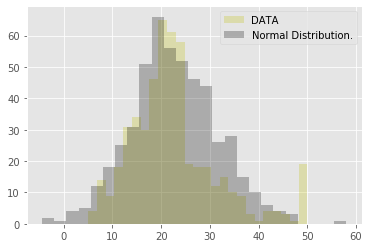

In [6]:
# Create histograms to visualise the distribution of house prices
plt.hist(houseprice, bins=25, color='y', alpha=0.25, label="DATA")
plt.hist(np.random.normal(22.53, 9.2, 506), color='k', alpha=0.25, bins = 25, label = "Normal Distribution.")
plt.legend()
plt.show()

## Plots to Describe the Data Set 
TODO

INSERT rationale for sorting data
and
Why fill used, can skew perception of values but indicates if obvious relationship between factors and MEDV

In [7]:
MEDV = df['medv']

CRIM = df['crim']
RM = df['rm']
DIS = df['dis']
TAX = df['tax']
CHAS = df['chas']
BK = df['b']
LSTAT = df['lstat']
CHAS = df['chas']
ZN = df['zn']
INDUS  = df['indus']
PTRATIO  = df['ptratio']
NOX  = df['nox']
AGE  = df['age']
RAD  = df['rad']

In [8]:
type(MEDV)

pandas.core.series.Series

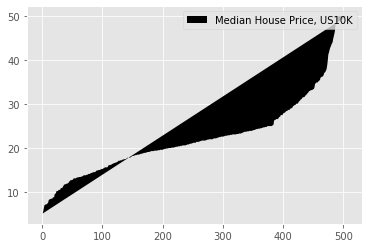

In [9]:
x = np.arange(0.0, 506, 1.0)

medv = np.sort(MEDV)

plt.fill(x, medv, 'k-', label="Median House Price, US10K")
plt.legend()


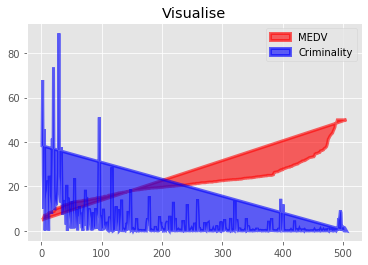

In [10]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, CRIM, c='b', alpha=0.6, lw=3.0, label="Criminality")

plt.title("Visualise")
plt.legend();

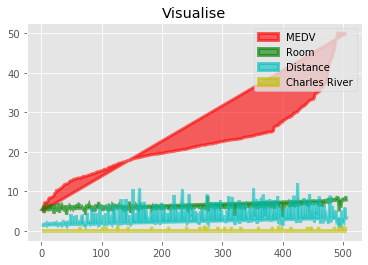

In [11]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, RM, c='g', alpha=0.6, lw=3.0, label ="Room")
plt.fill(x, DIS, c='c', alpha=0.6, lw=3.0, label ="Distance")
plt.fill(x, CHAS, c='y', alpha=0.6, lw=3.0, label ="Charles River")


plt.title("Visualise")
plt.legend();

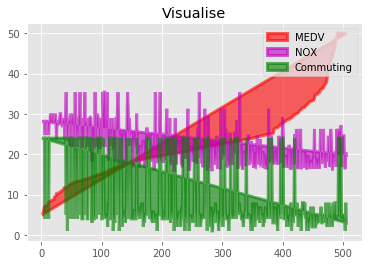

In [12]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

#Scaling NOX parameter to view against Median house price 
scaleNOX = NOX * (MEDV.mean()/NOX.mean())

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, scaleNOX, c='m', alpha=0.6, lw=3.0, label ="NOX")
plt.fill(x, RAD, c='g', alpha=0.6, lw=3.0, label ="Commuting")

plt.title("Visualise")
plt.legend();

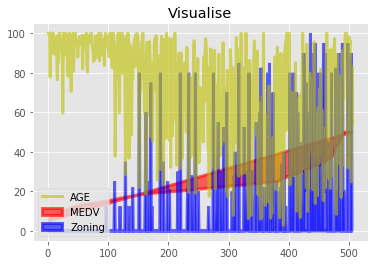

In [13]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, ZN, c='b', alpha=0.6, lw=3.0, label ="Zoning")
plt.plot(x, AGE, c='y', alpha=0.6, lw=3.0, label ="AGE")


plt.title("Visualise")
plt.legend();

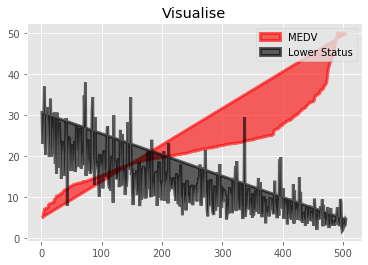

In [14]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, LSTAT, c='k', alpha=0.6, lw=3.0, label ="Lower Status")

plt.title("Visualise")
plt.legend();

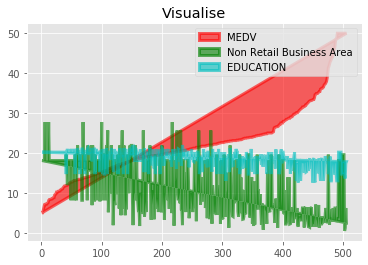

In [15]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

plt.fill(x, MEDV, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, INDUS, c='g', alpha=0.6, lw=3.0, label ="Non Retail Business Area")
plt.fill(x, PTRATIO, c='c', alpha=0.6, lw=3.0, label ="EDUCATION")



plt.title("Visualise")
plt.legend();

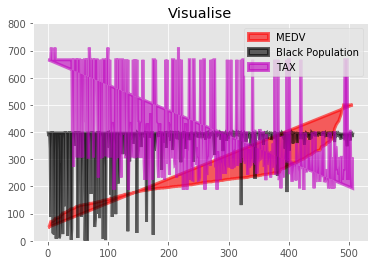

In [16]:
x = np.arange(1, 507, 1.0)

#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

plt.fill(x, MEDV*10, c='r', alpha=0.6, lw=3.0, label ="MEDV")
plt.fill(x, BK, c='k', alpha=0.6, lw=3.0, label ="Black Population")
plt.fill(x, TAX, c='m', alpha=0.6, lw=3.0, label ="TAX")


x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,0,800))


plt.title("Visualise")
plt.legend();

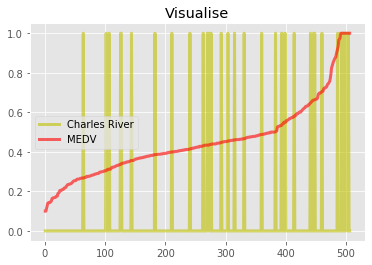

In [17]:
x = np.arange(1, 507, 1.0)

plt.plot(x, CHAS, c='y', alpha=0.6, lw=3.0, label ="Charles River")
plt.plot(x, MEDV/50, c='r', alpha=0.6, lw=3.0, label ="MEDV")

plt.title("Visualise")
plt.legend();

## Charles River Impact
The objective of this section is to use inferential statistics to analyse whether there is a significant difference in median house prices between houses that border the Charles river and those that do not border the Charles River.

In [18]:
# CHAS variable: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
CHAS.sum()

35

From 506 data rows, there are 35 cases where CHAS variable is true.

In [19]:
# Selecting rows where chas variable is true
dfCHAS = df.loc[df['chas'] == 1]

In [20]:
# Selecting data for median house price
a = dfCHAS['medv']

In [21]:
print("The median house price bordering Charles river is",a.median())

The median house price bordering Charles river is 23.3


In [22]:
# Selecting rows where chas variable is NOT true
dfnCHAS = df.loc[df['chas'] == 0]

In [23]:
# Selecting data for median house price
b = dfnCHAS['medv']

In [24]:
print("The median house price bordering not Charles river is",b.median())

The median house price bordering not Charles river is 20.9


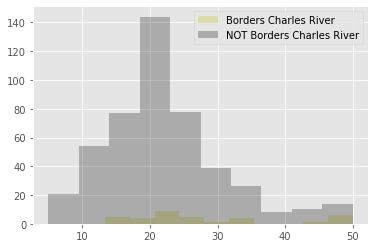

In [25]:
plt.hist(a, color='y', alpha=0.25, label="Borders Charles River")
plt.hist(b, color='k', alpha=0.25, label="NOT Borders Charles River")
plt.legend()
plt.show()

### T-TEST

The independent t-test could be used to compare the means of the two groups (independant variables) below with regard to the same dependant variable of house price:
* houses bordering the Charles river
* housees not bordering the Charles river

To check if data can be analysed with independant t-test there are six assumptions that should be checked before progressing(REF 4).
1. Dependant variable, house price, should be measured on a continuous scale. House price measured on US$ scale.
2. Independant variables should be two independant catagorical groups. Bordering Charles river : True or False.
3. Independance of observations. Assumed no relationahsip between data in each group or between groups.
4. No significant outliers. From plotting medv, no significant outliers apparent.
5. Dependant variable, house price, should be normally distributed for each group. Discussed below.
6. Requires homogeneity of variances. Discussed below.

#### Are groups for median house prices normally distributed, are T-Tests applicable
As plotted at beginning of notebook to visualise the median house price, overall the data set appears normally distributed.

In below cell a check was performed with QQ plot from statsmodels, fit against the expected diagonal pattern for normal distribution is accentuted at the upper and lower bounds but overall a reasonable fit.

A similar appearance of below graph is generated for:
* The overall set of data on median house prices
* Group bordering the Charles River
* Group not bordering Charles River

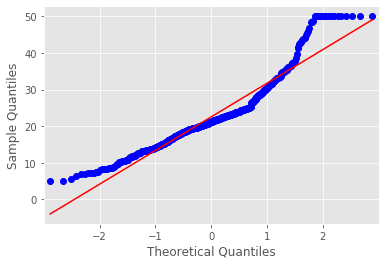

In [26]:
from statsmodels.graphics.gofplots import qqplot
qqplot(MEDV, line='s')
plt.show()

Below cell uses stats.normaltest to assess distribution of:
* medv, All median house prices  <b>Appears not normal distribution</b>
* a, Median house prices bordering Charles River <b>Appears normal distribution</b>
* b, Median house prices not bordering Charles River <b>Appears not normal distribution</b>

If p from stats.normaltest > alpha, appears normal / Gaussian.

In [27]:

alpha = 0.05

stat, p = stats.normaltest(medv)
print('MEDV, all data, Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.normaltest(a)
print('Houses bordering Charles River, Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.normaltest(b)
print('Houses not bordering Charles River, Statistics=%.3f, p=%.3f' % (stat, p))



MEDV, all data, Statistics=90.975, p=0.000
Houses bordering Charles River, Statistics=5.439, p=0.066
Houses not bordering Charles River, Statistics=81.133, p=0.000


#### Homogeneity of variances, are T-Tests applicable
The Levene test tests the null hypothesis that all input samples are from populations with equal variances. 

If the resulting p-value of Levene's test is less than a value of 0.05, the obtained differences in sample variances are unlikely to be from a population with equal variances. Therefore the null hypothesis of equal variances is rejected and it is concluded that there is a difference between the variances in the population. REF6.

In [28]:
# center = mean: Recommended from SciPy documentation for symmetric, moderate-tailed distributions.
stats.levene(a,b,center='mean')

LeveneResult(statistic=8.751904896045993, pvalue=0.003238119367639829)

Given a close approximation to normal distribution for each group of median house prices, and from failed Levene test for homogeneity of variances will use Welch's t-test.

Welch's T-Test is a two sample test used to test the hypotheses that two populations have equal means and suited where two samples have unequal variances and/or unequal sample sizes.REF5.

In [29]:
stats.ttest_ind(df['medv'][df['chas']==1], df['medv'][df['chas']==0], equal_var=0)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

### Conclusion on Charles River Impact
As the P Value from Welsh's T-Test of 0.0036 is less than indicator of 0.05, this shows significance. 
Therefore the null hypothesis that the two population means are equal is rejected and there is a significant difference in median house prices between houses that border the Charles river and those that do not. 

Assumption of normallly distributed distributions. 

## Model
Use keras to create a neural network that can predict the median house price based on the other variables in the dataset

Keras was initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System

TensorFlow 2 and Keras installed on machine.


Reviewing the plots from beginning of notebook where there appears to be a relationship between the factors and median house price and the data is not erratic(subjective), the following variables were chosen as starting point for a neural network:


* RM - average number of rooms per dwelling
* LSTAT - percentage lower status of the population
* NOX - nitric oxides concentration (parts per 10 million)
* INDUS - proportion of non-retail business acres per town.
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* TAX - full-value property-tax rate per 10,000 dolla bills
* CRIM - per capita crime rate by town


In [382]:
inputs = df[['rm','lstat','nox','indus','b','tax','crim']]

In [383]:
output = df[['medv']]

In [384]:
pca = dec.PCA(n_components=7, whiten=True)
pca.fit(inputs)
xwhite = pd.DataFrame(pca.transform(inputs), columns=inputs.columns)
xwhite

,rm,lstat,nox,indus,b,tax,crim
0,1.350020,-1.439693,4.352055,0.663508,-0.659647,-0.420012,-0.105339
1,1.374000,-1.293509,7.410942,3.823539,1.423060,0.239917,0.151547
2,1.347279,-1.441091,2.478397,0.094051,-0.671495,-1.031594,-0.004328
3,1.443626,-0.731872,0.692004,-1.404370,-1.633720,-1.164939,-0.149108
4,1.869505,2.293214,4.844102,0.657299,-1.125614,1.025736,-0.481251
...,...,...,...,...,...,...,...
501,-0.049861,-0.134533,-0.579754,0.200437,2.880923,-2.150783,-0.251439
502,-0.903690,0.114535,-0.406212,1.322114,-0.472643,-1.728981,-0.118969
503,-1.217092,0.310552,-0.088640,1.079399,-0.088010,-1.881931,-0.437403
504,-0.597889,0.069144,-0.427692,0.841641,0.320731,-3.537472,-0.050946


In [385]:
m = kr.models.Sequential()

In [386]:
m.add(kr.layers.Dense(10,input_dim=7,activation="linear"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(50, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")
m.fit(xwhite,output,epochs=25,batch_size=25)

Epoch 1/25
506/506 [==============================] - 12s 25ms/step - loss: 519.6332
Epoch 2/25
506/506 [==============================] - 0s 929us/step - loss: 226.7183
Epoch 3/25
506/506 [==============================] - 1s 1ms/step - loss: 78.5502
Epoch 4/25
506/506 [==============================] - 1s 1ms/step - loss: 45.8994
Epoch 5/25
506/506 [==============================] - 1s 2ms/step - loss: 31.5258: 0s - loss: 33.
Epoch 6/25
506/506 [==============================] - 1s 1ms/step - loss: 25.1795: 0s - loss: 2
Epoch 7/25
506/506 [==============================] - 1s 1ms/step - loss: 21.6731
Epoch 8/25
506/506 [==============================] - 1s 1ms/step - loss: 18.8057
Epoch 9/25
506/506 [==============================] - 1s 2ms/step - loss: 17.5889
Epoch 10/25
506/506 [==============================] - 1s 2ms/step - loss: 16.6246
Epoch 11/25
506/506 [==============================] - 1s 1ms/step - loss: 15.5072: 0s - loss: 16.04 - ETA: 0s
Epoch 12/25
506/506 [===========

In [387]:
# Run each x value through the neural network.
p = m.predict(xwhite)

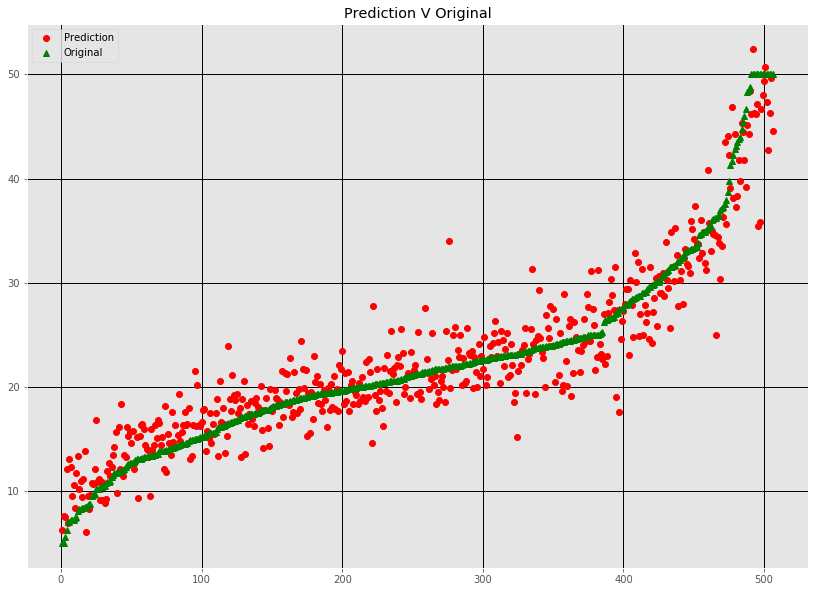

In [388]:
# Plot the values

x = np.arange(1, 507, 1.0)


plt.plot(x, p, 'ro', label='Prediction')
plt.plot(x, MEDV, 'g^', label='Original')
plt.grid(color = 'black', linewidth=1)
plt.title("Prediction V Original")
plt.legend()

In [372]:
inputs = df[['zn','chas','age','dis','rad','ptratio','rm','lstat','nox','indus','b','tax','crim']]

In [373]:
output = df[['medv']]

In [374]:
inputs.corr()

,zn,chas,age,dis,rad,ptratio,rm,lstat,nox,indus,b,tax,crim
zn,1.000000,-0.042697,-0.569537,0.664408,-0.311948,-0.391679,0.311991,-0.412995,-0.516604,-0.533828,0.175520,-0.314563,-0.200469
chas,-0.042697,1.000000,0.086518,-0.099176,-0.007368,-0.121515,0.091251,-0.053929,0.091203,0.062938,0.048788,-0.035587,-0.055892
age,-0.569537,0.086518,1.000000,-0.747881,0.456022,0.261515,-0.240265,0.602339,0.731470,0.644779,-0.273534,0.506456,0.352734
dis,0.664408,-0.099176,-0.747881,1.000000,-0.494588,-0.232471,0.205246,-0.496996,-0.769230,-0.708027,0.291512,-0.534432,-0.379670
rad,-0.311948,-0.007368,0.456022,-0.494588,1.000000,0.464741,-0.209847,0.488676,0.611441,0.595129,-0.444413,0.910228,0.625505
ptratio,-0.391679,-0.121515,0.261515,-0.232471,0.464741,1.000000,-0.355501,0.374044,0.188933,0.383248,-0.177383,0.460853,0.289946
rm,0.311991,0.091251,-0.240265,0.205246,-0.209847,-0.355501,1.000000,-0.613808,-0.302188,-0.391676,0.128069,-0.292048,-0.219247
lstat,-0.412995,-0.053929,0.602339,-0.496996,0.488676,0.374044,-0.613808,1.000000,0.590879,0.603800,-0.366087,0.543993,0.455621
nox,-0.516604,0.091203,0.731470,-0.769230,0.611441,0.188933,-0.302188,0.590879,1.000000,0.763651,-0.380051,0.668023,0.420972
indus,-0.533828,0.062938,0.644779,-0.708027,0.595129,0.383248,-0.391676,0.603800,0.763651,1.000000,-0.356977,0.720760,0.406583


In [375]:
#scaler = pre.StandardScaler()
#scaler.fit(inputs)
#scaler.mean_, scaler.scale_

In [376]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(inputs)
xwhite = pd.DataFrame(pca.transform(inputs), columns=inputs.columns)
xwhite

,zn,chas,age,dis,rad,ptratio,rm,lstat,nox,indus,b,tax,crim
0,1.357113,-1.440157,-0.365770,0.465796,4.298369,0.939289,-0.091000,0.555564,-0.331403,-0.106656,-0.496140,0.022005,0.093711
1,1.380817,-1.293930,-0.343176,0.490934,8.003520,-1.303602,2.203716,1.711920,0.214744,0.433523,-0.043123,0.156223,0.507576
2,1.354389,-1.441555,-0.347789,0.433297,2.374306,0.715753,-0.461681,-0.003749,-0.273717,-0.168792,-1.005020,-0.169788,0.159493
3,1.439055,-0.730560,0.282692,-0.462964,0.444721,2.134928,-1.403187,-0.664089,-0.754867,-1.071541,-1.259976,-0.127212,0.229556
4,1.870566,2.293659,-0.135152,0.419211,4.767537,1.447538,-0.181118,1.207135,-0.175252,0.062938,0.828306,0.427758,-0.367185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.034562,-0.136204,-1.006758,0.530968,-0.825883,-1.434444,2.696664,0.082434,-1.360842,0.908233,-1.855037,-1.041024,-0.783666
502,-0.929930,0.116616,2.021222,1.990053,0.109041,-0.535593,-0.039742,-0.568877,-1.032434,-1.336198,-1.079217,-0.491174,-0.229441
503,-1.246646,0.312823,2.242040,2.254962,0.339564,-0.068563,0.522366,-0.912654,-1.217604,-1.434000,-1.244946,3.516017,-0.551878
504,-0.582115,0.066589,-0.943820,0.139110,-0.245374,-1.862287,-0.459360,-0.256124,-0.339830,-0.362097,-3.273822,-0.728108,-0.460920


In [377]:
m = kr.models.Sequential()

In [381]:
m.add(kr.layers.Dense(10,input_dim=13,activation="linear"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1000, activation="relu"))
m.add(kr.layers.Dense(10, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")
m.fit(xwhite,output,epochs=50,batch_size=50)

Epoch 1/50
506/506 [==============================] - 13s 26ms/step - loss: 584.5600
Epoch 2/50
506/506 [==============================] - 0s 797us/step - loss: 315.2895
Epoch 3/50
506/506 [==============================] - 0s 886us/step - loss: 59.5873
Epoch 4/50
506/506 [==============================] - 0s 816us/step - loss: 32.64840s - loss:
Epoch 5/50
506/506 [==============================] - 0s 888us/step - loss: 18.0857
Epoch 6/50
506/506 [==============================] - ETA: 0s - loss: 12.67 - 1s 1ms/step - loss: 12.6556
Epoch 7/50
506/506 [==============================] - 1s 2ms/step - loss: 10.6421: 0s - loss:
Epoch 8/50
506/506 [==============================] - 1s 2ms/step - loss: 9.7477
Epoch 9/50
506/506 [==============================] - 0s 939us/step - loss: 9.2756
Epoch 10/50
506/506 [==============================] - 1s 1ms/step - loss: 8.9561
Epoch 11/50
506/506 [==============================] - 1s 1ms/step - loss: 8.9825A: 0s - loss: 8.
Epoch 12/50
506/506 [===

In [379]:
# Run each x value through the neural network.
p = m.predict(xwhite)

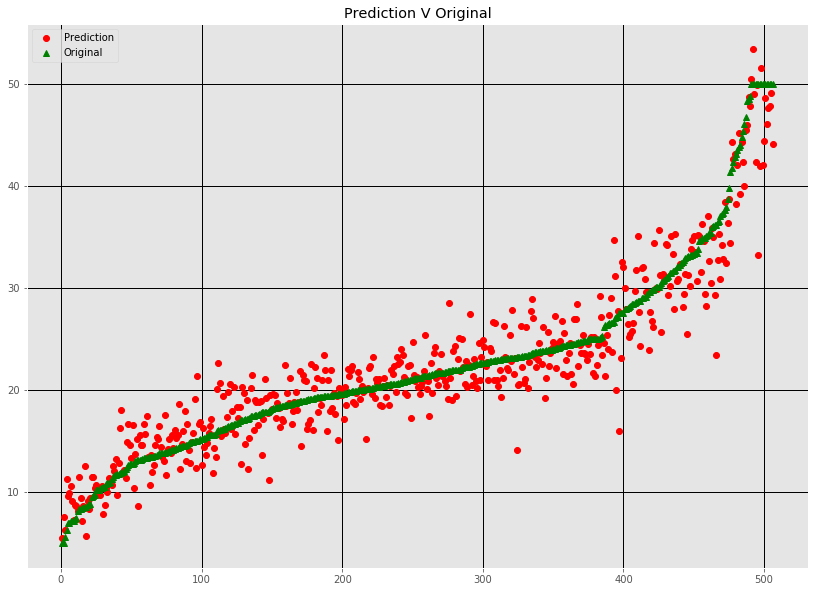

In [380]:
# Plot the values

x = np.arange(1, 507, 1.0)


plt.plot(x, p, 'ro', label='Prediction')
plt.plot(x, MEDV, 'g^', label='Original')
plt.grid(color = 'black', linewidth=1)
plt.title("Prediction V Original")
plt.legend()

## References

1. Data Set from Github, https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv 
2. Keras, https://keras.io/#getting-started-30-seconds-to-keras
3. Data Set CSO, https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
4. Laerd Statistics, https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php
5. Welch's t-test, https://en.wikipedia.org/wiki/Welch%27s_t-test
6. Levene's Test, https://en.wikipedia.org/wiki/Levene%27s_test

## Assignment:
https://github.com/ianmcloughlin/project-2019-machstat/raw/master/project.pdf